In [1]:
using Revise
using BiMDPs

In [2]:
dir = "case011"

"case011"

In [3]:
rgw = case_dictionary[dir]

BiMDPs.MRoverWorld.MRoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 25
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles_grid: Array{Float64}((10, 10, 25)) [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; -5.0 -5.0 … 0.0 0.0; -5.0 -5.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; -5.0 -5.0 … -5.0 0.0; … ; -5.0 -5.0 … -5.0 0.0; -5.0 -5.0 … -5.0 0.0;;; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 -5.0; … ; -5.0 -5.0 … -5.0 -5.0; -5.0 -5.0 … -5.0 0.0]
  exit_xys: Array{Tuple{Int64, Int64}}((1,))
  measure_reward: Float64 2.0


## Plot rewards grid

In [88]:
BiMDPs.create_reward_field_evolution_gif(rgw; dir=dir, dpi=1200)

"case011/reward_evolution.gif"

In [5]:
# BiMDPs.create_reward_field_evolution_imgs(rgw; dir=dir)

## Do one instance of a solve with Fine-grained MDP

In [15]:
using Random
rng = Random.seed!(11)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_finegrained_mdp(rgw, max_iters=100, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

(43.3454004, 72.2308159332722, Tuple{BiMDPs.MRoverWorld.MState, BiMDPs.MRoverWorld.MAction, Float64}[(BiMDPs.MRoverWorld.MState(6, 8, 1, Bool[0, 0], Bool[0, 0]), BiMDPs.MRoverWorld.RIGHT, 0.0), (BiMDPs.MRoverWorld.MState(7, 8, 2, Bool[0, 0], Bool[0, 0]), BiMDPs.MRoverWorld.RIGHT, 0.0), (BiMDPs.MRoverWorld.MState(8, 8, 3, Bool[0, 0], Bool[0, 0]), BiMDPs.MRoverWorld.MEASURE, 2.0), (BiMDPs.MRoverWorld.MState(8, 8, 4, Bool[0, 1], Bool[0, 0]), BiMDPs.MRoverWorld.RIGHT, 0.0), (BiMDPs.MRoverWorld.MState(9, 8, 5, Bool[0, 1], Bool[0, 0]), BiMDPs.MRoverWorld.DOWN, 50.0), (BiMDPs.MRoverWorld.MState(9, 7, 6, Bool[0, 1], Bool[0, 1]), BiMDPs.MRoverWorld.DOWN, 0.0), (BiMDPs.MRoverWorld.MState(9, 6, 7, Bool[0, 1], Bool[0, 1]), BiMDPs.MRoverWorld.DOWN, 0.0), (BiMDPs.MRoverWorld.MState(9, 5, 8, Bool[0, 1], Bool[0, 1]), BiMDPs.MRoverWorld.DOWN, 0.0), (BiMDPs.MRoverWorld.MState(9, 4, 9, Bool[0, 1], Bool[0, 1]), BiMDPs.MRoverWorld.DOWN, 0.0), (BiMDPs.MRoverWorld.MState(9, 3, 10, Bool[0, 1], Bool[0, 1]), Bi

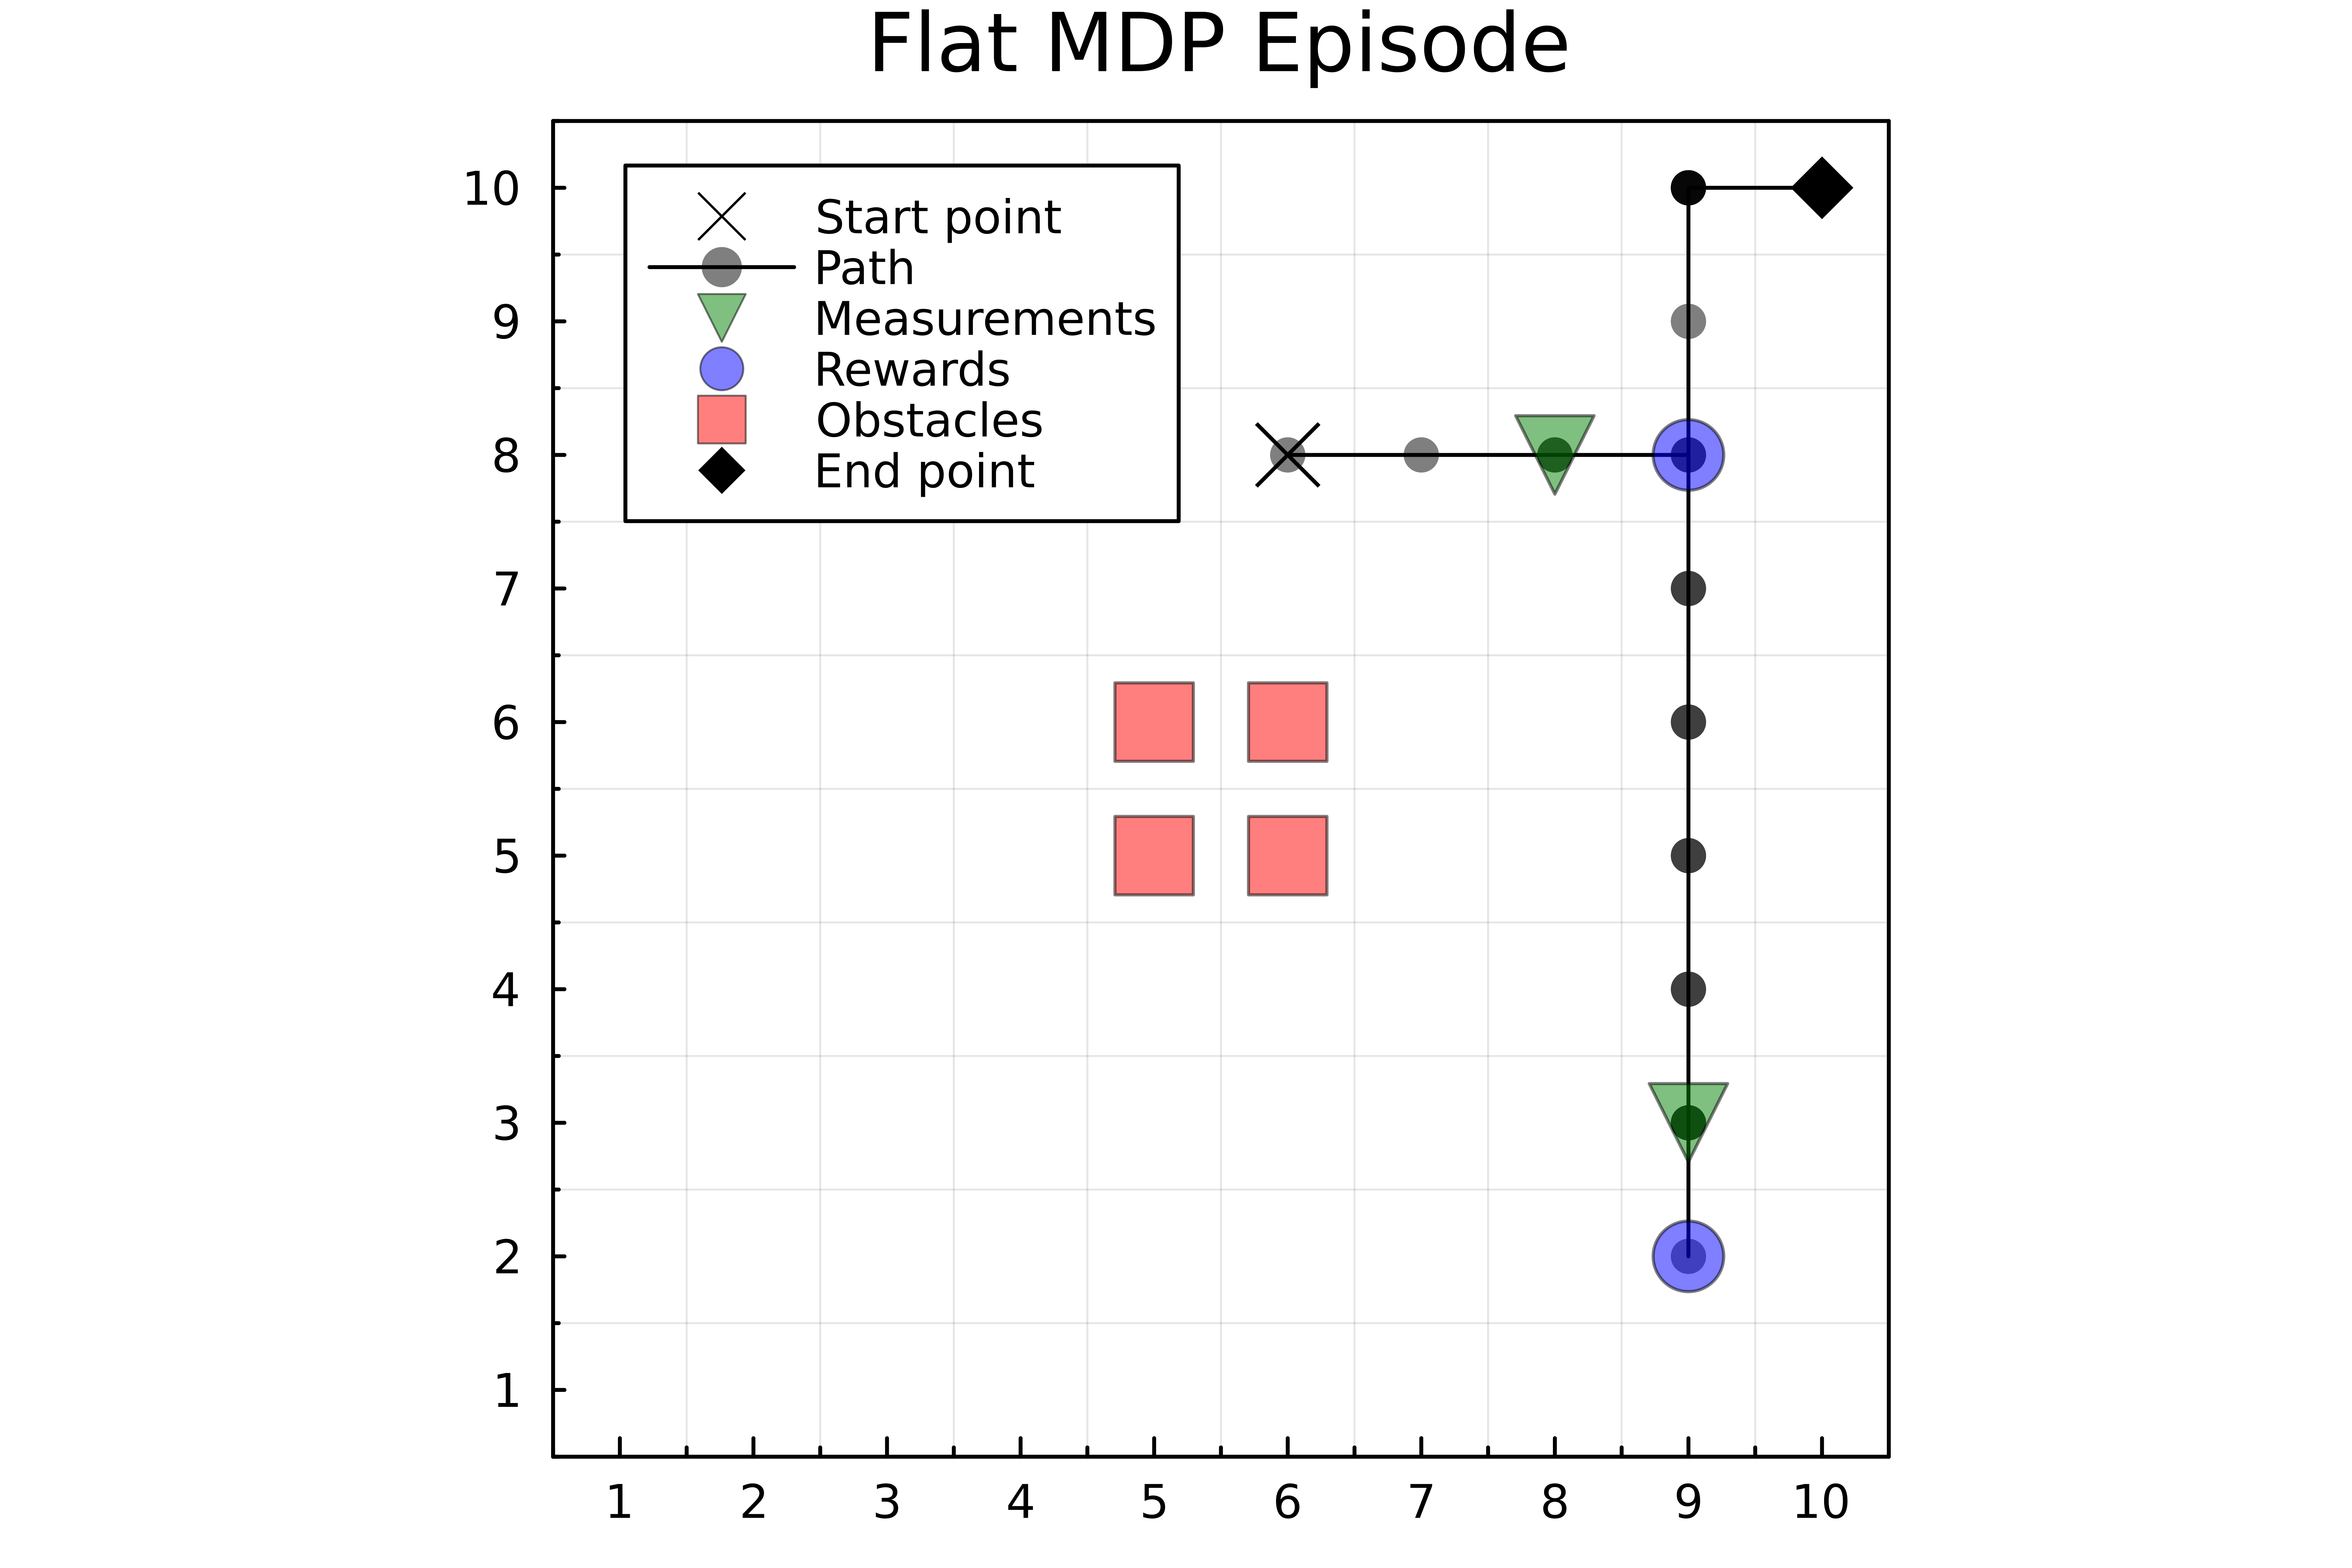

In [5]:
# BiMDPs.plot_finegrained_simulated_episode(rgw, sar_history, dir=dir)
BiMDPs.plot_finegrained_simulated_episode(rgw, sar_history, fname="d_flat_mdp_episode", dir=dir)

In [9]:
using BiMDPs

In [16]:
BiMDPs.animate_finegrained_simulated_episode(rgw, sar_history, fname="flat_mdp_episode_gif", dir=dir, dpi=1200, fps=1, fig_title="")


"case011/flat_mdp_episode_gif.gif"

## Do one instance of a solve with Bi-Level MDP

In [8]:
using Random
rng = Random.seed!(11)
if rgw isa RoverWorld.RoverWorldMDP
    s0 = RoverWorld.rand_starting_state(rng, rgw)
elseif rgw isa MRoverWorld.MRoverWorldMDP
    s0 = MRoverWorld.rand_starting_state(rng, rgw)
end
comp_time, r, sar_history = solve_using_bilevel_mdp(rgw, max_iters=200, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

(6.518055, 49.47076627360481, Tuple{Union{BiMDPs.MLLRoverWorld.MLLState, BiMDPs.HLRoverWorld.HLState}, Union{BiMDPs.HLRoverWorld.HLAction, BiMDPs.MLLRoverWorld.MLLAction}, Union{Nothing, Float64}}[(BiMDPs.HLRoverWorld.HLState(6, 8, 1, Bool[0, 0]), BiMDPs.HLRoverWorld.HLAction(1), nothing), (BiMDPs.MLLRoverWorld.MLLState(6, 8, 1, false), BiMDPs.MLLRoverWorld.DOWN, 0.0), (BiMDPs.MLLRoverWorld.MLLState(6, 7, 2, false), BiMDPs.MLLRoverWorld.RIGHT, 0.0), (BiMDPs.MLLRoverWorld.MLLState(7, 7, 3, false), BiMDPs.MLLRoverWorld.DOWN, 0.0), (BiMDPs.MLLRoverWorld.MLLState(7, 6, 4, false), BiMDPs.MLLRoverWorld.DOWN, 0.0), (BiMDPs.MLLRoverWorld.MLLState(7, 5, 5, false), BiMDPs.MLLRoverWorld.DOWN, 0.0), (BiMDPs.MLLRoverWorld.MLLState(7, 4, 6, false), BiMDPs.MLLRoverWorld.DOWN, 0.0), (BiMDPs.MLLRoverWorld.MLLState(7, 3, 7, false), BiMDPs.MLLRoverWorld.RIGHT, 0.0), (BiMDPs.MLLRoverWorld.MLLState(8, 3, 8, false), BiMDPs.MLLRoverWorld.MEASURE, 2.0), (BiMDPs.MLLRoverWorld.MLLState(8, 3, 9, true), BiMDPs.ML

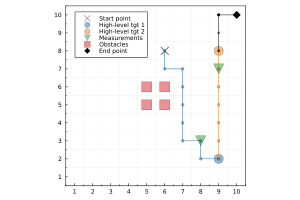

In [13]:
BiMDPs.plot_bilevel_simulated_episode(rgw, sar_history, fname="d_bilevel_mdp_episode", dir=dir, dpi=50, fig_title="")

In [32]:
using BiMDPs

In [14]:
BiMDPs.animate_bilevel_simulated_episode(rgw, sar_history, fname="bilevel_mdp_episode_gif", dir=dir, dpi=1200, fps=1, fig_title="")


"case011/bilevel_mdp_episode_gif.gif"

## Compare optimality vs computation time


In [4]:
using JLD2
# fname = dir*"/"*"data-2023-10-03_22_20.jld2"
# fname = dir*"/"*"data-2023-10-03_23_57.jld2"
# fname = dir*"/"*"data-2023-10-04_00_50.jld2"
# fname = dir*"/"*"data-2023-10-05_01_25.jld2"
# fname = dir*"/"*"data-2023-10-05_01_29.jld2"
fname = "case013"*"/"*"data-2023-10-05_02_24.jld2"
results = load(fname)["data"]

Dict{Any, Any} with 4 entries:
  "vi"        => ([2.94292, 13.4027, 21.3301, 26.7101, 39.6862, 52.907, 131.616…
  "sarsa"     => ([0.0291458, 0.18077, 1.46577, 15.4383, 19.1976, 27.1908, 30.2…
  "bl_vi"     => ([2.27467, 9.05155, 18.5743, 19.3882, 20.2429, 18.8261, 18.783…
  "qlearning" => ([0.061611, 0.152924, 1.43508, 13.5395, 16.8, 24.3723, 26.4721…

In [11]:
BiMDPs.plot_optimality_vs_compute(results, dir = dir, dpi=1200, with_ablations=true, use_title=false)

## Vary grid size

In [4]:
using JLD2
fname = "varygrid"*"/"*"varygridsize-data-2023-10-05_06_21.jld2"
results = load(fname)["data"]

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 2 entries:
  "vi"    => ([1.59712, 24.1465, 177.853, 632.88, 1569.78], [72.517, 57.2044, 4…
  "bl_vi" => ([0.613585, 4.31046, 24.5242, 83.9571, 202.888], [70.9998, 53.6052…

In [89]:
using BiMDPs

In [91]:
BiMDPs.plot_optimality_compute_vs_gridsize(results, dir="varygrid", dpi=1200, with_ablations=true, use_title=false, show_relative_reward=true)

"c:\\Users\\somri\\OneDrive - Leland Stanford Junior University\\Somrita\\Research\\BiLevelMDP IEEE Aero 2024\\code\\BiMDPs.jl\\notebooks\\varygrid\\vary_gridsize_ablation_3.png"